In [ ]:
import numpy as np
import scipy, warnings, copy
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_regression, make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.preprocessing import StandardScaler

%matplotlib inline 

In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt

In [ ]:
## функция для генерации "предсказаний" с заданным уровнем ошибок 
def make_errors(Y, frac = .3, seed = 42):
    """
    Y - our "true" binary labels
    frac - the "desired" error rate
    """
    np.random.seed(seed)
    ## выберем индексы ответов, которые у нас будут ошибочными
    ix = np.random.choice(range(len(Y)), replace=False, size =int(len(Y) * frac)) 
    Ys = copy.copy(Y) ## создадим копию массива с ответами, чтобы не изменять оригинальные ответы
    Ys[ix] = np.abs(Y[ix] - 1) ## инвертируем метки классов
    return Ys

In [ ]:
## результаты "предсказания"
np.random.seed(0) ## зафиксируем random seed
Yp = np.random.uniform(0, 0.9, 100) ## синтезируем ответы
Yp = np.array([0.49393215, 0.64367043, 0.54248704, 0.49039486, 0.38128932, 0.5813047 , 0.39382849, 0.8025957 ,
            0.86729648, 0.34509737, 0.71255253, 0.47600543, 0.5112401 , 0.83303697, 0.06393245, 0.07841637,
            0.01819656, 0.74935786, 0.70034108, 0.78301093, 0.88075651, 0.71924271, 0.41533143, 0.70247626, 
            0.10644698, 0.57592892, 0.12901796, 0.85020203, 0.46966349, 0.37319575, 0.23810005, 0.69681032, 
            0.4105353 , 0.51159055, 0.01691082, 0.55587195, 0.55088615, 0.5552406 , 0.84937327, 0.61363827,
            0.32355711, 0.39332876, 0.62786808, 0.05420292, 0.60009004, 0.60357408, 0.1893443 , 0.11603367,
            0.28388552, 0.32733969, 0.51317709, 0.39474136, 0.88953645, 0.09184033, 0.18798908, 0.14517857,
            0.58779749, 0.22796244, 0.4196797 , 0.21998303, 0.14307263, 0.09933763, 0.59069663, 0.12436466,
            0.17692413, 0.33185265, 0.73889391, 0.08739115, 0.75415042, 0.08648857, 0.87881352, 0.42178608,
            0.87908498, 0.54436097, 0.66533722, 0.03526901, 0.25452627, 0.10817691, 0.26652618, 0.10685495,
            0.28618486, 0.3728367 , 0.05773275, 0.62322491, 0.50994131, 0.23885054, 0.47092325, 0.08454646,
            0.51835185, 0.83636658, 0.28671206, 0.60066934, 0.11861808, 0.64469448, 0.26046548, 0.16487223,
            0.52786164, 0.01809679, 0.74604603, 0.00422593])

## настоящие ответы - метки классов
Yt = np.array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
            1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
            1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int)

In [ ]:
Ypred = Yp >= 0.5 #если взять за порог 0.5
Ys = make_errors(Yt, frac=0.27) #сразу получить метки класса (на основе истинных) с частотой ошибок 0.27

##confusion matrix

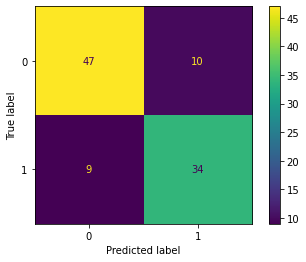

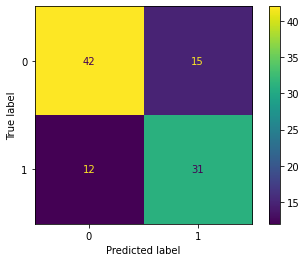

In [ ]:
#Вариант 1
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix(Yt, Ypred), display_labels=[0, 1])
disp_2 = metrics.ConfusionMatrixDisplay(confusion_matrix(Yt, Ys), display_labels=[0, 1])
disp_1.plot();
disp_2.plot();

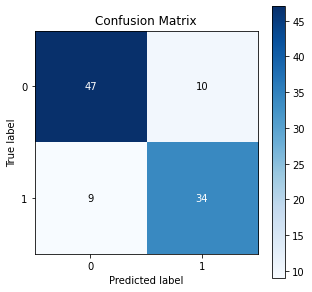

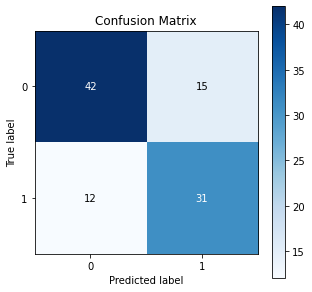

In [ ]:
#Вариант 2
skplt.metrics.plot_confusion_matrix(Yt, Ypred, figsize=(5,5));
skplt.metrics.plot_confusion_matrix(Yt, Ys, figsize=(5,5));

#accuracy_score
#precision_score
#recall_score
#f1_score

In [ ]:
#Вариант 1
tn, fp, fn, tp = confusion_matrix(Yt, Ypred).ravel()
tn_s, fp_s, fn_s, tp_s = confusion_matrix(Yt, Ys).ravel()

In [ ]:
Accuracy = (tp+tn)/(tn+fp+tp+fn)
Recall = tp/(tp+fn)
Precision = tp/(tp+fp)
#The F1 Score is the 2*((precision*recall)/(precision+recall))
F1 = 2*((Precision*Recall)/(Precision+Recall))

Accuracy_s = (tp_s+tn_s)/(tn_s+fp_s+tp_s+fn_s)
Recall_s = tp_s/(tp_s+fn_s)
Precision_s = tp_s/(tp_s+fp_s)
F1_s = 2*((Precision_s*Recall_s)/(Precision_s+Recall_s))


print("Accuracy score - {}, \nPrecision score - {}, \nRecall score - {},\
 \nf1_score - {}".format(Accuracy, Precision, Recall, F1))
print("---")
print("Accuracy score - {}, \nPrecision score - {}, \nRecall score - {},\
 \nf1_score - {}".format(Accuracy_s, Precision_s, Recall_s, F1_s))


Accuracy score - 0.81, 
Precision score - 0.7727272727272727, 
Recall score - 0.7906976744186046, 
f1_score - 0.7816091954022988
---
Accuracy score - 0.73, 
Precision score - 0.6739130434782609, 
Recall score - 0.7209302325581395, 
f1_score - 0.6966292134831461


In [ ]:
#Вариант 2
acc_score = accuracy_score(Yt, Ypred)
pre_score = precision_score(Yt, Ypred)
rec_score = recall_score(Yt, Ypred)
f1m_score = f1_score(Yt, Ypred)

acc_score_s = accuracy_score(Yt, Ys)
pre_score_s = precision_score(Yt, Ys)
rec_score_s = recall_score(Yt, Ys)
f1m_score_s = f1_score(Yt, Ys)


print("Accuracy score - {}, \nPrecision score - {}, \nRecall score - {},\
 \nf1_score - {}".format(acc_score, pre_score, rec_score, f1m_score))
print("---")
print("Accuracy score - {}, \nPrecision score - {}, \nRecall score - {},\
 \nf1_score - {}".format(acc_score_s, pre_score_s, rec_score_s, f1m_score_s))

Accuracy score - 0.81, 
Precision score - 0.7727272727272727, 
Recall score - 0.7906976744186046, 
f1_score - 0.7816091954022988
---
Accuracy score - 0.73, 
Precision score - 0.6739130434782609, 
Recall score - 0.7209302325581395, 
f1_score - 0.6966292134831461


##ROC,AUC


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


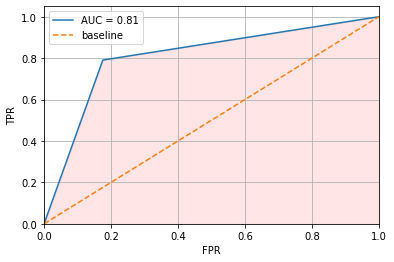

In [ ]:
# fpr : array, shape = [>2] Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
# tpr : array, shape = [>2] Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
# thresholds : array, shape = [n_thresholds] Decreasing thresholds on the decision 
# function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.


fpr, tpr, treshholds = metrics.roc_curve(y_true=Yt, y_score=Ypred)
auc = metrics.roc_auc_score(y_true=Yt, y_score=Ypred)

_, ax = plt.subplots(ncols=1)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
sns.lineplot(fpr, tpr, label='AUC = {}'.format(round(auc,2)))
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid()
ax.fill_between(fpr, tpr, color='red', alpha=0.1)
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


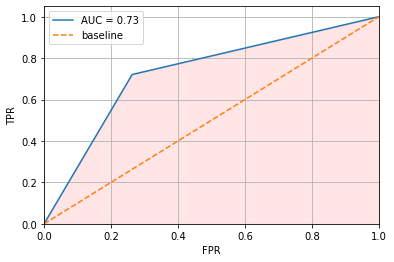

In [ ]:
fpr_s, tpr_s, treshholds_s = metrics.roc_curve(y_true=Yt, y_score=Ys)
auc_s = metrics.roc_auc_score(y_true=Yt, y_score=Ys)

_, ax = plt.subplots(ncols=1)
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
sns.lineplot(fpr_s, tpr_s, label='AUC = {}'.format(round(auc_s,2)))
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid()
ax.fill_between(fpr_s, tpr_s, color='red', alpha=0.1)
plt.legend();

In [ ]:
list_pr_zn = np.arange(0.1, 0.99, 0.0001, dtype=float)

In [ ]:
np.random.seed(42)
Y =  np.hstack( [ np.ones(20), np.zeros(180) ] ) 
np.random.shuffle(Y)
Yp1 = make_errors(Y, 0.25, seed = 9)
Yp2 = make_errors(Y, 0.25, seed = 42)
Yp3 = make_errors(Y, 0.25, seed = 1024)
Yp4 = np.zeros(200)

In [ ]:
tmp_list = [Yp1, Yp2, Yp3,Yp4]

##accuracy каждого из методов


In [ ]:
for i in range(0, 4):
  print("Accuracy для метода {} равняется {}".format("Yp"+str(i+1), metrics.accuracy_score(y_true= Y, y_pred = tmp_list[i])))

Accuracy для метода Yp1 равняется 0.75
Accuracy для метода Yp2 равняется 0.75
Accuracy для метода Yp3 равняется 0.75
Accuracy для метода Yp4 равняется 0.9


Лучше метод, где все значения 0 -> Yp4 = (np.zeros(200). Это обусловлено тем, что у нас изначально 180 объектов класса 0

##F1

In [ ]:
for i in range(0, 4):
  print("Метрика F1 для метода {} равняется {}".format("Yp"+str(i+1), metrics.f1_score(y_true= Y, y_pred = tmp_list[i])))

Метрика F1 для метода Yp1 равняется 0.3055555555555555
Метрика F1 для метода Yp2 равняется 0.41860465116279066
Метрика F1 для метода Yp3 равняется 0.375
Метрика F1 для метода Yp4 равняется 0.0


Здесь можно увидеть, что все отличается, и 4-ый метод показывает результат 0. F1 метрика не учитывает Accuracy, а рассчитывается так: The F1 Score is the 2((precision*recall)/(precision+recall))

In [ ]:
Yc = ((Yp2+Yp3+Yp1)/2 > 0.5)
print("Accuracy равняется {}, \nF1-метрика равняется {}".format(metrics.accuracy_score(y_true = Y, y_pred = Yc), metrics.f1_score(y_true = Y, y_pred = Yc)))

Accuracy равняется 0.875, 
F1-метрика равняется 0.5762711864406781


In [ ]:
Yc_2 = ((Yp1 + Yp2 + Yp3 + Yp4)/4 > 0.5)
print("Accuracy равняется {}, \nF1-метрика равняется {}".format(metrics.accuracy_score(y_true = Y, y_pred = Yc_2), metrics.f1_score(y_true = Y, y_pred = Yc_2)))

Accuracy равняется 0.925, 
F1-метрика равняется 0.5161290322580645


Значение Accuracy увеличилось, а F1-метрики уменьшилось. Объясняется просто: Yp4 содержит только нулевые значения, то есть мы добавили только 0, а поделили на 4. К тому же изначально (Y) содержит 90% нулевых значений - это позволило повысить точность. Но при этом уменьшатся значения recall и precision - поэтому уменьшается F1-метрика. Ну а общий вывод: усреднение, как показала практика, позволяет улучшить результат.

In [ ]:
np.random.seed(42)
N = 30    ## количество наблюдений
D = 10000 ## размерность наших данных -- например, число некоторых генов, экспрессию которых мы изучаем
Y = pd.Series(np.random.normal(0, 1, N)) ## это какие-то наши целевые значения
X = pd.DataFrame( np.random.normal(0, 1, (N, D)) ) ## это наши независимые переменные, скажем экспрессия некоторых генов
## как мы видим все эти данные абсолютно случайные...

In [ ]:
## можем ли мы получить высокую корреляцию с нашей целевой переменной?
ccY = X.corrwith(Y)
cor = ccY[abs(ccY) > 0.5]
cor

262     0.548257
300    -0.653086
306    -0.571563
355     0.641488
516     0.502555
          ...   
9253    0.561741
9400   -0.555903
9465   -0.560610
9830    0.546244
9841   -0.621939
Length: 61, dtype: float64

In [ ]:
## теперь давайте проведем аналогичный эксперимент для нашей матрицы X... 
## определим "коэкспрессию" ...
ccX = X.corr()

In [ ]:
# f = lambda x: abs(x) > 0.5

In [ ]:
df = pd.DataFrame(ccX.iloc[0,1:])
df.columns = ['Corr']
print(df.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df.query('abs(Corr) > 0.5')))

          Corr
496   0.519495
984  -0.515107
1023 -0.554383
1399  0.554175
1475 -0.532659
1484  0.520587
1521  0.576797
1586 -0.518212
1655 -0.635552
1716 -0.518309
1719 -0.571093
2297 -0.506652
2313  0.520582
2513  0.500484
2528 -0.570054
2916  0.509382
2960 -0.530043
3121  0.506425
3393 -0.518806
4136  0.506732
4282 -0.521409
4611 -0.563301
5101 -0.593555
5167  0.502925
5627 -0.541334
5783  0.519420
6294 -0.552567
6486 -0.518423
6546 -0.542719
6629  0.608451
6669 -0.685885
6704 -0.506781
6983 -0.571601
7090 -0.550971
7105  0.659117
7119  0.614717
7322  0.530988
7334  0.512481
7427 -0.576307
7451 -0.529288
7854 -0.729853
7978 -0.526462
8065 -0.511038
8299  0.548434
8385 -0.553075
8446 -0.520349
8637  0.518106
8722 -0.513217
8839  0.577545
8930 -0.546740
9006 -0.598799
9397  0.511029 
Количество -  52


In [ ]:
np.random.seed(42)
N1, N2 = 10, 100 
D = 10000 
Y1, Y2 = pd.Series(np.random.normal(0, 1, N1)), pd.Series(np.random.normal(0, 1, N2)) 
X1, X2 = pd.DataFrame(np.random.normal(0, 1, (N1, D))), pd.DataFrame( np.random.normal(0, 1, (N2, D))) 

In [ ]:
ccY_1 = X1.corrwith(Y1)
cor_1 = ccY_1[abs(ccY_1) > 0.5]
ccY_2 = X2.corrwith(Y2)
cor_2 = ccY_2[abs(ccY_2) > 0.5]

Корреляция между X Y

In [ ]:
cor_1

23      0.720791
31     -0.554484
35     -0.515063
40     -0.524333
54      0.562507
          ...   
9959    0.682714
9962   -0.600501
9963    0.587980
9994   -0.582686
9998    0.532795
Length: 1422, dtype: float64

In [ ]:
cor_2

Series([], dtype: float64)

Коэкспрессия

In [ ]:
ccX_1 = X1.corr()
df_1 = pd.DataFrame(ccX_1.iloc[0,1:])
df_1.columns = ['Corr']
print(df_1.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df_1.query('abs(Corr) > 0.5')))

          Corr
7     0.730425
11    0.639558
12   -0.574916
15   -0.716813
31   -0.531898
...        ...
9975  0.655490
9981  0.590966
9991 -0.508036
9992  0.507136
9996 -0.512031

[1452 rows x 1 columns] 
Количество -  1452


In [ ]:
ccX_2 = X2.corr()
df_2 = pd.DataFrame(ccX_2.iloc[0,1:])
df_2.columns = ['Corr']
print(df_2.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df_2.query('abs(Corr) > 0.5')))

Empty DataFrame
Columns: [Corr]
Index: [] 
Количество -  0


In [ ]:
N = 30    
D1, D2, D3 = 100, 500, 5000 
Y = pd.Series(np.random.normal(0, 1, N)) 
X_1, X_2, X_3 = pd.DataFrame( np.random.normal(0, 1, (N, D1))), pd.DataFrame( np.random.normal(0, 1, (N, D2))), pd.DataFrame( np.random.normal(0, 1, (N, D3))) 

Корреляция между X Y

In [ ]:
ccY_1, ccY_2, ccY_3 = X_1.corrwith(Y), X_2.corrwith(Y), X_3.corrwith(Y)
cor_1, cor_2, cor_3 = ccY_1[abs(ccY_1) > 0.5], ccY_2[abs(ccY_2) > 0.5], ccY_3[abs(ccY_3) > 0.5] 

D = 100

In [ ]:
cor_1

31    0.534687
dtype: float64

D = 500

In [ ]:
cor_2

405    0.556437
dtype: float64

D = 5000

In [ ]:
cor_3

51      0.532358
125     0.524696
413    -0.532541
841    -0.547637
929     0.510529
1390   -0.511725
1922   -0.558476
2114   -0.525503
2556   -0.572173
2665    0.504482
2756   -0.553601
3364    0.583807
3411   -0.518037
3446    0.502956
3882   -0.579018
4068   -0.593040
4335    0.503205
4493    0.511670
dtype: float64

Коэкспрессия

In [ ]:
ccX_1, ccX_2, ccX_3 = X_1.corr(), X_2.corr(), X_3.corr()

In [ ]:
df_3 = pd.DataFrame(ccX_1.iloc[0,1:])
df_3.columns = ['Corr']
print("D = 100")
print(df_3.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df_3.query('abs(Corr) > 0.5')))
print("---")
df_4 = pd.DataFrame(ccX_2.iloc[0,1:])
df_4.columns = ['Corr']
print("D = 500")
print(df_4.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df_4.query('abs(Corr) > 0.5')))
print("---")
df_5 = pd.DataFrame(ccX_3.iloc[0,1:])
df_5.columns = ['Corr']
print("D = 5000")
print(df_5.query('abs(Corr) > 0.5'), '\nКоличество - ', len(df_5.query('abs(Corr) > 0.5')))

D = 100
Empty DataFrame
Columns: [Corr]
Index: [] 
Количество -  0
---
D = 500
         Corr
229 -0.642045
332  0.559612 
Количество -  2
---
D = 5000
          Corr
438   0.530574
771   0.500740
777  -0.570703
803  -0.507999
993   0.513758
1063  0.508971
1065 -0.577562
1297 -0.581061
1525  0.526416
2049 -0.525753
2220 -0.610654
2286 -0.534726
2318  0.500345
2613 -0.579174
2626  0.583692
2695  0.563845
3027 -0.537480
3351 -0.601565
3433 -0.555061
3509 -0.542026
3814 -0.617019
3920 -0.610725
4145  0.503140
4450  0.521076
4608  0.521273 
Количество -  25


In [ ]:
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def myy(x):
    return np.cos(1.5 * np.pi * x)

def poly_lm(X,y, dg):
    polynomial_features = PolynomialFeatures(degree=dg,
                                             include_bias=False)
    linear_regression = lm.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    return pipeline

np.random.seed(0)
X = np.random.rand(70) ## набор тренировочных данных X
y = myy(X) + np.random.randn(70) * 0.1 ## набор истинных значений y для тренировочного набора

X_test = np.linspace(-.01, 1.01, 30)  ## набор тестовых данных X
y_test = myy(X_test) ## набор истинных значений y для тестового набора

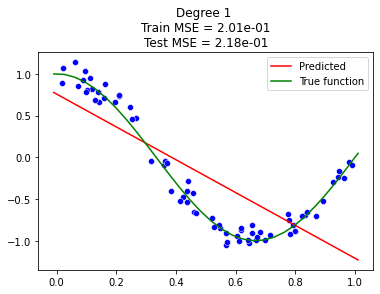

In [ ]:
## получим модель для степени = 1
mod1 = poly_lm( X, y, dg = 1 )
## выполним предсказание для тестового набора
y_test_pred = mod1.predict(X_test[:, np.newaxis])
mse_train = metrics.mean_squared_error(y_true = y, y_pred = mod1.predict(X[:, np.newaxis]))
mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = y_test_pred)
_, ax = plt.subplots(ncols=1)
sns.lineplot(x = X_test, y = y_test_pred, color = 'red', label='Predicted', ax = ax)
sns.lineplot(x = X_test, y = y_test, color = 'green', label='True function', ax = ax)
sns.scatterplot(x = X, y = y, color = 'blue', ax = ax)
ax.set_title("Degree 1 \nTrain MSE = {:.2e}\nTest MSE = {:.2e}".format(mse_train, mse_test));

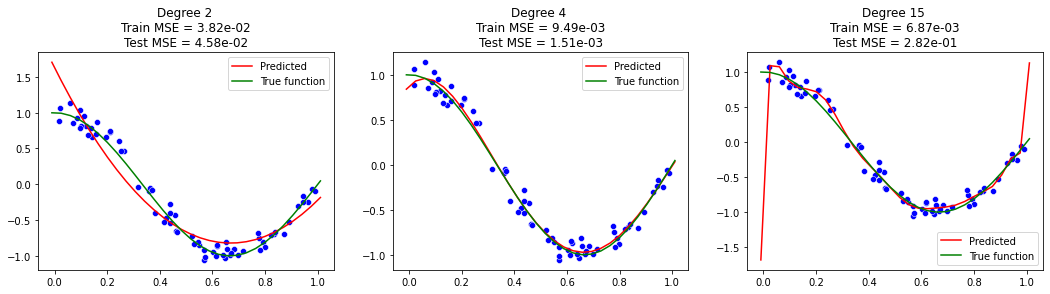

In [ ]:
_, axes = plt.subplots(ncols=3, figsize = (18, 4))
i = 0
for dg in [2, 4, 15]:
  mod = poly_lm(X, y, dg)
  y_test_pred = mod.predict(X_test[:, np.newaxis])
  mse_train = metrics.mean_squared_error(y_true = y, y_pred = mod.predict(X[:, np.newaxis]))
  mse_test = metrics.mean_squared_error(y_true = y_test, y_pred = y_test_pred)
  sns.lineplot(x = X_test, y = y_test_pred, color = 'red', label='Predicted', ax = axes[i])
  sns.lineplot(x = X_test, y = y_test, color = 'green', label='True function', ax = axes[i])
  sns.scatterplot(x = X, y = y, color = 'blue', ax = axes[i])
  axes[i].set_title("Degree {} \nTrain MSE = {:.2e}\nTest MSE = {:.2e}".format(dg, mse_train, mse_test))
  i += 1

Оптимальной является модель со степенью 4, так как на тествоых данных данная модель показывает наилучший результат. Модель со степенью 15, если я правильно понимаю, переобучилась. У нее наименьшая MSE на тренировочном наборе данных, но при этом наибольшая MSE на тестовой выборке. 

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021')

Mounted at /content/drive


Большинство градиентных методов (на которых по-сути и основаны почти все алгоритмы машинного обучения) сильно чуствительны к шкалированию данных. Поэтому перед запуском алгоритмов чаще всего делается либо нормализация, либо так называемая стандартизация. Нормализация предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. Стандартизация же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1. Всегда стоит обращать внимание на диапазон значений параметров. В большинстве случаев при построении моделей, кластеризации, использовании методов снижения размерности данных наиболее важным окажется тот из признаков, который обладает наибольшей дисперсией. Поэтому часто необходимо выполнять шкалирование данных.

In [ ]:
X1, Y1 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=None, 
                             shuffle = False,
                             random_state=42)

X2, Y2 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=1, 
                             shuffle = False,
                             random_state=42)

XY3 = pd.read_csv('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021/Никита Алексеевич Нечепаренко - X3.csv')
X3, Y3 = XY3.iloc[:,1:], XY3.Y

Чтобы посмотреть на разброс значений можно воспользоваться boxplot.

Для X1

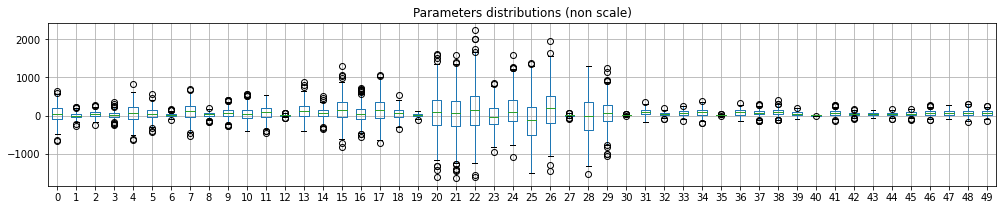

In [ ]:
df_x1 = pd.DataFrame(X1)
g = df_x1.boxplot(figsize = (17, 3))
g.set_title('Parameters distributions (non scale)');

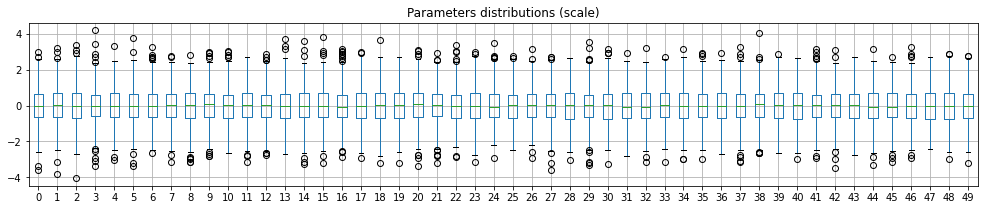

In [ ]:
df_x1_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X1))
gsc = df_x1_scaled.boxplot(figsize = (17, 3))
gsc.set_title('Parameters distributions (scale)');

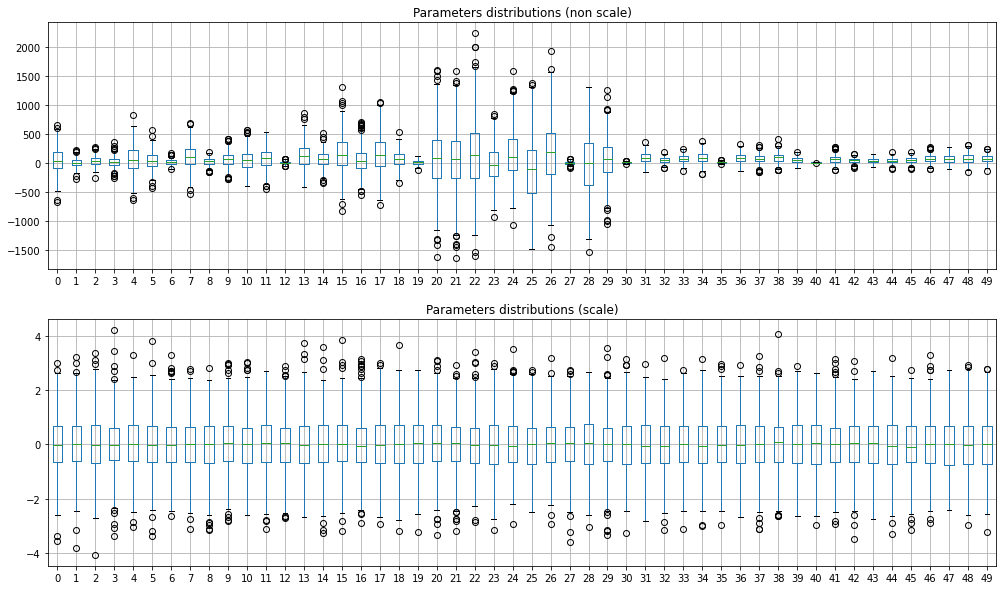

In [ ]:
_, axes = plt.subplots(nrows=2, figsize = (17, 10))
g = df_x1.boxplot(figsize = (17, 3), ax=axes[0])
g.set_title('Parameters distributions (non scale)');
gsc = df_x1_scaled.boxplot(figsize = (17, 3), ax = axes[1])
gsc.set_title('Parameters distributions (scale)');

Видно, что для X1 шкалирование пошло на пользу: Изначально разброс был большим, например, столбец 22. После шкалирования же видно, что теперь разброс на всех столбцах стал +\- соизмеримым. (общая картинка прилагается сверху)

Для X2

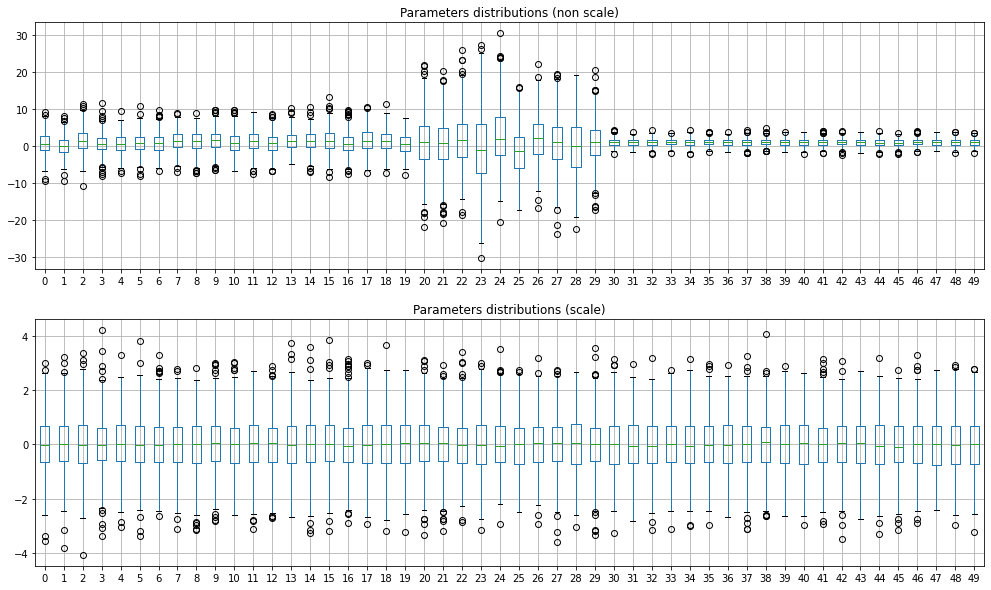

In [ ]:
df_x2 = pd.DataFrame(X2)
df_x2_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X2))
_, axes = plt.subplots(nrows=2, figsize = (17, 10))
g2 = df_x2.boxplot(figsize = (17, 3), ax=axes[0])
g2.set_title('Parameters distributions (non scale)');
gsc2 = df_x2_scaled.boxplot(figsize = (17, 3), ax = axes[1])
gsc2.set_title('Parameters distributions (scale)');

Для X2 складывается впечатление, что набор данных как и для X1, но в ином "масштабе". Разброс заметен, но выглядит не так критично, как раз-таки из-за "масштабности" начальных данных.

Для X3

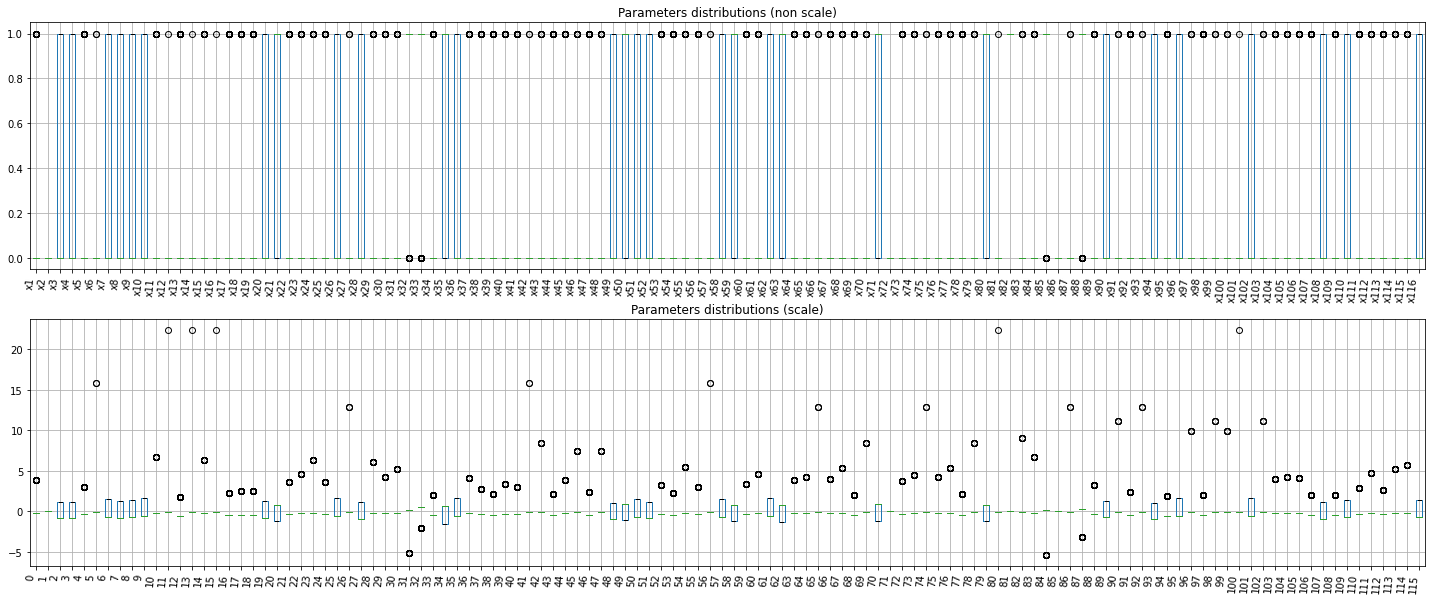

In [ ]:
df_x3 = pd.DataFrame(X3)
df_x3_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X3))
_, axes = plt.subplots(nrows=2, figsize = (25, 10))
g3 = df_x3.boxplot(figsize = (17, 3), ax=axes[0])
g3.set_title('Parameters distributions (non scale)');
gsc3 = df_x3_scaled.boxplot(figsize = (17, 3), ax = axes[1])
gsc3.set_title('Parameters distributions (scale)');
_ = plt.setp(g3.get_xticklabels(), rotation=85, horizontalalignment='right')
_ = plt.setp(gsc3.get_xticklabels(), rotation=85, horizontalalignment='right')

Ну с X3 все ясно, данные бинарные (первый график). Шкалирование не нужно.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Вам дан набор неразмеченных данных X4. 

In [ ]:
X4 = pd.read_csv('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021/Никита Алексеевич Нечепаренко - X4.csv')

In [ ]:
print(X4.info())
print('---')
print(X4.head())
print('---')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
dtypes: float64(10)
memory usage: 7.9 KB
None
---
           0          1          2  ...          7         8          9
0  -8.191747 -11.726875   6.332432  ...  -7.889161 -9.053623  -9.868462
1  -7.235963  -9.966740  11.111664  ... -12.343645 -9.770047  -9.524445
2 -11.312542  -9.817638   8.650211  ...  -6.248635 -7.468400 -12.032515
3 -10.288081  -9.264625   9.602822  ...  -9.378393 -9.780879 -11.177039
4  -8.694749 -11.215950  11.657610  ...  -

In [ ]:
Xsc = StandardScaler().fit_transform(X4.astype('float64'))
Xsc = pd.DataFrame(Xsc, index=X4.index, columns=X4.columns)

In [ ]:
covmat = np.cov(Xsc.T)
vals, vecs = np.linalg.eig(covmat)
u,s,v = np.linalg.svd(covmat) ## SVD, u,s,v - левые сингулярные вектора, сингулярные значения, правые сингулярные вектора

In [ ]:
Xsc

,0,1,2,3,4,5,6,7,8,9
0,0.082337,-1.547004,-2.743242,1.353669,0.785078,1.005788,-0.291338,0.092143,-0.212012,-0.390409
1,0.323111,-0.511494,0.000682,0.531929,-0.735767,0.450467,0.501836,-0.995579,-0.401743,-0.295519
2,-0.703831,-0.423775,-1.412524,0.383133,0.576577,-0.099944,0.291141,0.492736,0.207803,-0.987314
3,-0.445756,-0.098430,-0.865596,-0.716359,-0.704349,1.528731,0.839586,-0.271507,-0.404612,-0.751350
4,-0.044376,-1.246420,0.314129,-1.415778,-0.659091,-0.187650,0.581404,-0.066860,0.481543,0.187335
...,...,...,...,...,...,...,...,...,...,...
95,-0.280233,0.995779,0.302267,-1.181168,0.509900,-0.750047,-0.405242,0.074225,-0.183734,0.315162
96,4.816699,0.338296,1.713251,-0.564285,-4.629156,-1.956382,-4.490482,4.784497,4.819252,5.283756
97,0.045892,-0.212117,0.015648,-0.021615,-0.176750,0.808641,-0.174659,-0.562389,-0.339333,-0.145691
98,-0.292258,-0.623733,0.931614,0.126983,-0.312066,0.687182,0.576308,-0.016485,0.114204,-0.296741


In [ ]:
np.where(s > s.sum()/len(s))[0] #Выбор числа ГК 

array([0, 1, 2])

In [ ]:
skpcamod = PCA().fit(X = Xsc)

In [ ]:
Xsc.shape[1]

10

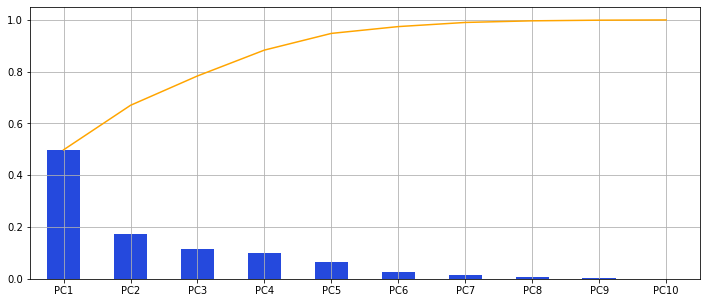

In [ ]:
pd.Series(s/s.sum(), 
          index = [f'PC{x+1}' for x in range(Xsc.shape[1])]).plot.bar( color = '#2549dd', figsize = (12, 5));
pd.Series((s/s.sum()).cumsum(), 
          index = [f'PC{x+1}' for x in range(Xsc.shape[1])]).plot( color = 'orange');
plt.grid();

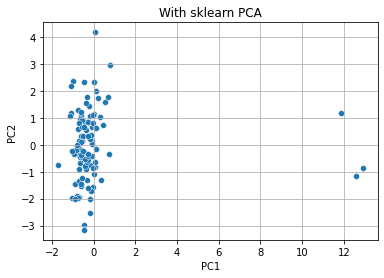

In [ ]:
ax1 = plt.subplot()
scores_skl = pd.DataFrame(skpcamod.transform(Xsc)[:,:2])
scores_skl.columns = ['PC1','PC2']
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_skl, ax = ax1)
ax1.set_title('With sklearn PCA');
plt.grid();

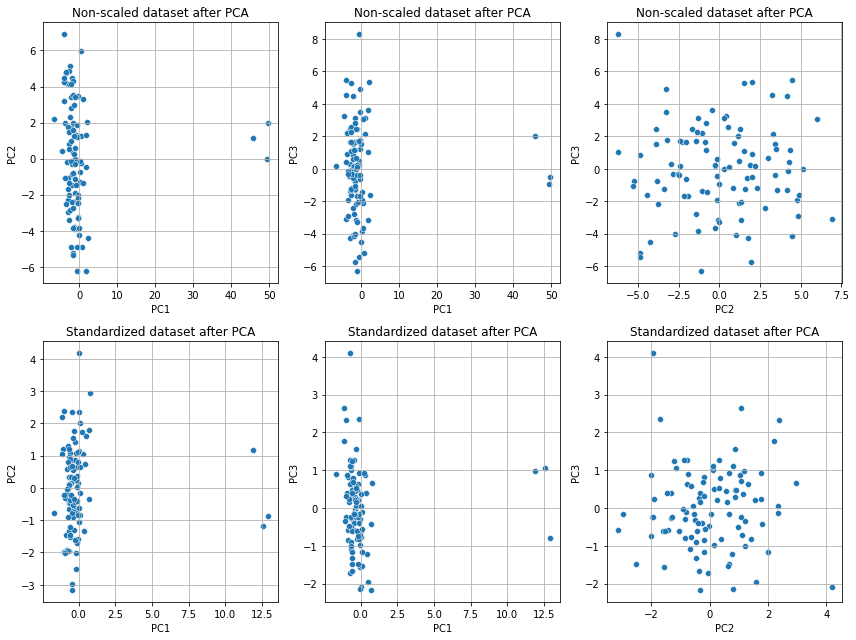

In [ ]:
sklearn_pca = PCA(n_components=3)
sklearn_transf = pd.DataFrame(sklearn_pca.fit_transform(Xsc), # проводим МГК стандартизованных данных
                              columns = ['PC1','PC2','PC3'])

sklearn_pca_unsc = PCA(n_components=3)
sklearn_transf_unsc = pd.DataFrame(sklearn_pca_unsc.fit_transform(X4), # проводим МГК нешкалированных данных
                                   columns = ['PC1','PC2','PC3'])

# а теперь посмотрим на результаты PCA
_, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols=3, figsize=(12, 9))
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf_unsc, ax = ax1)
sns.scatterplot(x = 'PC1', y = 'PC3', data = sklearn_transf_unsc, ax = ax2)
sns.scatterplot(x = 'PC2', y = 'PC3', data = sklearn_transf_unsc, ax = ax3)
sns.scatterplot(x = 'PC1', y = 'PC2', data = sklearn_transf, ax = ax4)
sns.scatterplot(x = 'PC1', y = 'PC3', data = sklearn_transf, ax = ax5)
sns.scatterplot(x = 'PC2', y = 'PC3', data = sklearn_transf, ax = ax6)

ax1.set_title('Non-scaled dataset after PCA')
ax2.set_title('Non-scaled dataset after PCA')
ax3.set_title('Non-scaled dataset after PCA')
ax4.set_title('Standardized dataset after PCA')
ax5.set_title('Standardized dataset after PCA')
ax6.set_title('Standardized dataset after PCA')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()

plt.tight_layout()

Исходя из полученной визуализации можно сделать вывод, что имеется три значения-выброса, отчетливо видны для PC1\PC2 и PC1\PC3. Как в такой ситуации поступать - вопрос. Можно либо выкинуть эти выбросы, но в то же время они расположены не так далеко друг от друга. Может, это сигнализирует о какой-то ошибке в сборе\наблюдении\подсчете данных.

In [ ]:
expr_data = pd.read_csv('/content/drive/MyDrive/Classroom/Анализ данных и машинное обучение. ФИТ. 2021/Никита Алексеевич Нечепаренко - expr_data.tsv', sep='\t')

In [ ]:
expr_data.drop(columns=['edate', 'library'], inplace=True)

In [ ]:
expr_data['class'].unique()

array(['treated', 'control'], dtype=object)

In [ ]:
expr_data.columns.unique()

Index(['sample', 'class', 'edate', 'library', 'Gene1', 'Gene2', 'Gene3',
       'Gene4', 'Gene5', 'Gene6',
       ...
       'Gene991', 'Gene992', 'Gene993', 'Gene994', 'Gene995', 'Gene996',
       'Gene997', 'Gene998', 'Gene999', 'Gene1000'],
      dtype='object', length=1004)

In [ ]:
df_treated = expr_data[:25]
df_treated

,sample,class,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12,Gene13,Gene14,Gene15,Gene16,Gene17,Gene18,Gene19,Gene20,Gene21,Gene22,Gene23,Gene24,Gene25,Gene26,Gene27,Gene28,Gene29,Gene30,Gene31,Gene32,Gene33,Gene34,Gene35,Gene36,Gene37,Gene38,...,Gene961,Gene962,Gene963,Gene964,Gene965,Gene966,Gene967,Gene968,Gene969,Gene970,Gene971,Gene972,Gene973,Gene974,Gene975,Gene976,Gene977,Gene978,Gene979,Gene980,Gene981,Gene982,Gene983,Gene984,Gene985,Gene986,Gene987,Gene988,Gene989,Gene990,Gene991,Gene992,Gene993,Gene994,Gene995,Gene996,Gene997,Gene998,Gene999,Gene1000
0,Cell1,treated,1,4,896,174,23,0,15,1,0,21,0,0,93,5,27,10,90,11,18,8,18,18,13,15,52,0,0,73,28,1,25,1,2,1,17,819,9,0,...,22,120,12,38,7,104,0,56,32,23,3,14,69,0,0,3,25,38,0,12,96,1,3,5,0,5,52,22,0,28,1,9,6,6,0,12,0,0,48,3
1,Cell2,treated,1,0,841,94,42,0,7,0,0,17,0,0,72,11,43,5,90,11,11,10,39,18,21,25,27,0,1,73,65,2,38,0,1,2,10,857,6,0,...,23,107,23,42,6,57,2,45,25,51,3,13,34,1,0,3,32,51,0,9,118,1,34,4,3,22,48,26,0,12,0,9,5,9,1,18,3,1,31,12
2,Cell3,treated,1,1,717,145,29,0,19,0,0,39,1,0,82,4,39,6,92,1,9,5,37,31,11,15,27,0,1,58,42,0,24,4,5,1,14,872,14,0,...,22,53,17,73,9,108,0,40,44,53,4,15,40,1,0,2,20,48,0,6,216,1,26,1,3,7,42,19,0,19,6,18,5,17,1,30,5,4,48,15
3,Cell4,treated,2,0,977,92,30,0,14,0,0,43,0,0,107,13,20,9,92,7,4,13,9,34,12,11,46,0,3,86,55,0,10,1,0,2,21,899,28,0,...,39,94,22,60,11,52,1,76,21,64,5,14,18,4,0,2,21,46,0,8,155,4,9,0,4,9,50,17,0,15,10,14,19,30,0,26,3,1,55,5
4,Cell5,treated,2,0,1018,213,40,0,35,0,2,45,0,0,118,11,23,9,120,7,16,2,39,27,10,30,41,0,0,61,52,0,38,0,0,2,26,922,21,0,...,21,116,23,67,13,89,4,130,53,78,8,27,61,3,0,5,44,76,0,7,115,2,10,1,1,12,50,14,0,10,15,5,6,19,0,30,7,0,77,22
5,Cell6,treated,4,2,684,120,25,0,22,0,0,22,0,0,53,2,26,2,33,5,8,4,13,17,7,13,19,0,0,43,36,0,19,0,4,1,24,754,8,0,...,18,105,8,54,12,56,1,87,28,30,2,19,31,4,0,2,11,30,0,8,129,3,17,4,3,3,38,11,0,9,2,9,8,44,2,26,12,1,35,2
6,Cell7,treated,1,5,1169,243,57,0,47,0,0,57,6,0,108,4,43,9,70,8,21,11,56,24,15,5,48,0,2,80,52,0,27,6,2,0,10,1432,33,0,...,21,133,18,69,25,130,0,64,44,50,7,18,46,1,0,7,40,64,0,10,134,3,20,2,8,13,41,39,0,22,3,13,12,9,0,25,5,1,53,6
7,Cell8,treated,0,8,793,122,58,0,10,3,0,32,1,0,88,11,32,14,84,5,17,7,41,18,13,11,58,0,1,58,35,4,23,6,5,0,19,1220,19,0,...,28,93,10,82,9,86,0,65,29,65,5,18,59,2,0,1,40,31,0,4,198,6,9,1,0,11,31,24,0,18,3,7,3,31,6,17,3,4,36,9
8,Cell9,treated,0,1,575,122,30,0,25,3,0,28,0,0,56,3,26,12,92,1,9,5,21,20,3,20,21,0,1,61,37,5,28,0,7,3,21,824,9,0,...,7,78,6,79,11,41,0,46,18,25,5,10,23,1,0,0,20,35,0,3,134,0,15,0,0,16,55,19,0,10,3,8,4,26,0,30,5,0,47,14
9,Cell10,treated,1,3,621,161,22,0,13,1,0,14,0,0,131,12,29,6,63,7,12,6,23,27,19,16,28,0,0,49,54,2,18,2,2,1,26,751,11,0,...,11,75,11,45,10,52,0,54,35,35,9,16,23,4,0,6,27,31,0,5,98,6,13,2,0,8,51,24,0,24,1,12,3,14,1,22,6,2,31,6


In [ ]:
df_control = expr_data[25:]

,sample,class,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12,Gene13,Gene14,Gene15,Gene16,Gene17,Gene18,Gene19,Gene20,Gene21,Gene22,Gene23,Gene24,Gene25,Gene26,Gene27,Gene28,Gene29,Gene30,Gene31,Gene32,Gene33,Gene34,Gene35,Gene36,Gene37,Gene38,...,Gene961,Gene962,Gene963,Gene964,Gene965,Gene966,Gene967,Gene968,Gene969,Gene970,Gene971,Gene972,Gene973,Gene974,Gene975,Gene976,Gene977,Gene978,Gene979,Gene980,Gene981,Gene982,Gene983,Gene984,Gene985,Gene986,Gene987,Gene988,Gene989,Gene990,Gene991,Gene992,Gene993,Gene994,Gene995,Gene996,Gene997,Gene998,Gene999,Gene1000
25,Cell26,control,0,6,1194,97,15,0,8,2,0,29,0,0,114,12,10,10,46,4,20,4,30,13,11,20,48,0,2,99,54,1,36,3,8,0,27,1151,13,0,...,19,73,9,46,14,105,0,29,15,88,8,28,27,0,0,9,17,42,0,15,212,3,7,2,2,19,59,26,0,23,3,5,6,12,1,57,3,2,71,9
26,Cell27,control,3,1,1654,148,44,0,28,2,1,25,0,0,141,6,41,19,46,24,38,15,11,23,22,18,64,0,2,153,55,1,23,3,0,3,15,1005,13,0,...,20,102,15,46,30,121,0,64,14,143,7,23,20,1,0,10,16,39,0,6,202,7,4,0,0,9,47,29,0,29,3,12,13,40,1,46,3,8,57,10
27,Cell28,control,4,1,1139,116,14,0,40,0,0,48,0,0,86,2,16,12,33,14,20,8,15,4,13,5,28,0,2,107,50,2,27,2,0,1,38,697,6,0,...,10,90,22,30,8,105,0,54,23,66,4,19,29,3,0,9,3,46,0,12,136,6,5,1,4,4,25,17,0,20,6,5,2,17,0,32,2,3,40,7
28,Cell29,control,2,1,1779,112,42,0,29,0,0,36,1,0,95,8,39,9,66,8,19,8,21,6,11,3,49,0,7,116,52,2,8,4,1,4,23,923,18,0,...,47,109,17,84,10,169,2,30,21,42,2,46,32,2,3,7,16,49,0,14,264,6,14,1,5,9,82,35,0,19,3,8,3,34,1,45,3,7,41,13
29,Cell30,control,4,2,1253,95,21,0,12,1,0,20,2,0,76,1,20,4,48,6,29,3,15,16,9,1,23,0,0,43,54,0,18,0,0,3,21,762,25,0,...,5,75,14,45,33,93,0,27,16,24,1,22,36,0,0,7,12,22,0,9,155,6,4,1,3,16,45,37,0,22,1,5,2,25,0,40,20,0,61,5
30,Cell31,control,3,2,731,62,27,0,12,0,1,22,0,0,81,7,15,5,40,7,14,13,19,14,1,5,36,0,0,95,26,0,14,2,3,10,3,725,9,0,...,36,52,6,19,12,79,6,46,8,51,5,20,18,1,0,4,9,29,0,13,148,3,2,0,0,7,23,15,0,13,1,9,0,9,0,26,5,10,42,6
31,Cell32,control,1,0,1144,72,26,0,15,6,0,24,0,0,54,7,19,15,29,14,14,15,15,24,4,7,13,0,1,109,56,0,17,0,8,1,17,545,22,0,...,11,65,18,16,29,89,0,55,15,65,6,12,19,0,0,8,11,63,0,5,117,4,13,0,2,19,57,21,0,8,4,2,7,9,3,45,4,0,54,6
32,Cell33,control,3,1,1292,97,22,0,17,3,0,14,0,0,68,9,22,9,21,16,23,18,20,20,14,11,37,0,5,46,80,0,23,3,0,3,10,899,22,0,...,25,66,12,27,12,125,2,16,24,55,12,23,43,1,0,3,10,35,0,11,164,10,8,0,2,5,41,23,0,13,1,5,19,10,0,53,7,2,45,5
33,Cell34,control,2,1,1133,87,46,0,18,0,0,13,0,0,52,3,25,1,41,9,19,12,30,10,10,1,13,0,0,94,31,0,25,0,0,4,24,727,23,0,...,15,106,17,34,12,88,0,15,15,71,5,19,25,2,0,5,15,18,0,6,141,5,10,0,0,11,78,21,0,5,2,4,6,33,3,36,11,0,31,12
34,Cell35,control,0,1,1373,115,12,0,21,2,0,21,1,0,78,11,23,4,35,7,9,4,28,30,8,7,44,0,2,117,53,0,25,2,3,1,22,824,9,0,...,28,117,19,28,23,71,0,48,19,48,7,17,34,4,0,5,5,24,0,6,166,8,10,0,4,14,48,14,0,10,0,15,10,18,0,36,6,2,50,7


In [ ]:
D_treated = df_treated[0:21]
T_treated = df_treated[21:]

In [ ]:
D_control = df_control[:17]
T_control = df_control[17:]

In [ ]:
Des_df = D_treated.append(D_control)
Des_df

In [ ]:
T_Des_df = T_treated.append(T_control)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
features = Des_df.loc[:, 'Gene1':]

In [ ]:
X = features
y = Des_df.loc[:,'class']

In [ ]:
cl = DecisionTreeClassifier().fit(X, y)

In [ ]:
y_pred = cl.predict(T_Des_df.loc[:,'Gene1':])

In [ ]:
print(classification_report(T_Des_df.loc[:, 'class'], y_pred))

              precision    recall  f1-score   support

     control       1.00      1.00      1.00         3
     treated       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [ ]:
print(export_text(cl))

|--- feature_484 <= 463.00
|   |--- class: control
|--- feature_484 >  463.00
|   |--- class: treated

